In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from itertools import cycle
from math import pi
from pytimeparse.timeparse import timeparse
import ast

%config Completer.use_jedi = False


In [2]:
# read data

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "experiment_results"
result_file = "results_all.csv"

# non_aug_filename = "baseline.csv"
# join_all = "join-all-baseline.csv"
# pipeline_small = "pipeline-best.csv"
# pipeline_big = "pipeline-all.csv"

filepath = os.path.join(folder_name, f"{dataset_path}/{result_file}")
dataframe = pd.read_csv(filepath)
dataframe
# join_all_filepath = os.path.join(folder_name, f"{dataset_path}{join_all}")
# join_all_df = pd.read_csv(join_all_filepath, header=0, engine="python", encoding="utf8", quotechar='"', escapechar='\\')

# pipeline_small_filepath = os.path.join(folder_name, f"{dataset_path}{pipeline_small}")
# pipeline_small_df = pd.read_csv(pipeline_small_filepath, header=0, engine="python", encoding="utf8", quotechar='"', escapechar='\\')

# pipeline_big_filepath = os.path.join(folder_name, f"{dataset_path}{pipeline_big}")
# pipeline_big_df = pd.read_csv(pipeline_big_filepath, header=0, engine="python", encoding="utf8", quotechar='"', escapechar='\\')



,approach,data_path,algorithm,depth,accuracy,join_time,train_time,total_time,feature_importances,fs_time
0,all-in-path,football/football.csv/id--football/differences...,CART,2.0,0.798761,2.075651,0.081938,2.157589,{'strong_score': 1.0},NaN
1,all-in-path,football/football.csv/id--football/differences...,ID3,2.0,0.519043,2.075651,269.792025,271.867676,{},NaN
2,all-in-path,football/football.csv/id--football/differences...,XGBoost,1.0,0.784404,2.075651,0.772123,2.847774,"{'date': 0.033, 'weak_team': 0.018, 'dif_overa...",NaN
3,best-ranked,football/football.csv/id--football/differences...,CART,4.0,0.785202,2.075651,0.087464,2.163115,"{'date': 0.022, 'dif_midfield': 0.016, 'id': 0...",NaN
4,best-ranked,football/football.csv/id--football/differences...,ID3,4.0,0.528358,2.075651,173.252891,175.328542,{},NaN
...,...,...,...,...,...,...,...,...,...,...
103,non-aug,other-data/decision-trees-split/titanic,ID3,2.0,0.383783,NaN,28.246128,28.246128,{},NaN
104,non-aug,other-data/decision-trees-split/titanic,XGBoost,1.0,0.562484,NaN,0.140772,0.140772,"{'PassengerId': 0.491, 'TicketId': 0.509}",NaN
105,non-aug,other-data/data/WebKP 2,CART,1.0,0.470925,NaN,0.012028,0.012028,{'webpage_id': 1.0},NaN
106,non-aug,other-data/data/WebKP 2,ID3,2.0,0.091131,NaN,13.375112,13.375112,{},NaN


In [3]:
# get original (base) table name from dataset name 

def shorten_dataset_name_join(data):
    if 'other-data' in data:
        partition = data.partition('other-data')[2]
        split = partition.split('/')[-1]
    else:
        split = data.split('/')[0]
    return split

def half_time(data):
    if 'other-data' in data:
        partition = data.partition('other-data')[2]
        split = partition.split('/')[-1]
    else:
        split = data.split('/')[0]
    return split

dataframe['dataset'] = dataframe['data_path'].apply(lambda x: shorten_dataset_name_join(x))



dataframe


,approach,data_path,algorithm,depth,accuracy,join_time,train_time,total_time,feature_importances,fs_time,dataset
0,all-in-path,football/football.csv/id--football/differences...,CART,2.0,0.798761,2.075651,0.081938,2.157589,{'strong_score': 1.0},NaN,football
1,all-in-path,football/football.csv/id--football/differences...,ID3,2.0,0.519043,2.075651,269.792025,271.867676,{},NaN,football
2,all-in-path,football/football.csv/id--football/differences...,XGBoost,1.0,0.784404,2.075651,0.772123,2.847774,"{'date': 0.033, 'weak_team': 0.018, 'dif_overa...",NaN,football
3,best-ranked,football/football.csv/id--football/differences...,CART,4.0,0.785202,2.075651,0.087464,2.163115,"{'date': 0.022, 'dif_midfield': 0.016, 'id': 0...",NaN,football
4,best-ranked,football/football.csv/id--football/differences...,ID3,4.0,0.528358,2.075651,173.252891,175.328542,{},NaN,football
...,...,...,...,...,...,...,...,...,...,...,...
103,non-aug,other-data/decision-trees-split/titanic,ID3,2.0,0.383783,NaN,28.246128,28.246128,{},NaN,titanic
104,non-aug,other-data/decision-trees-split/titanic,XGBoost,1.0,0.562484,NaN,0.140772,0.140772,"{'PassengerId': 0.491, 'TicketId': 0.509}",NaN,titanic
105,non-aug,other-data/data/WebKP 2,CART,1.0,0.470925,NaN,0.012028,0.012028,{'webpage_id': 1.0},NaN,WebKP 2
106,non-aug,other-data/data/WebKP 2,ID3,2.0,0.091131,NaN,13.375112,13.375112,{},NaN,WebKP 2


In [4]:
df1 = dataframe[(dataframe['approach']=='best-ranked') | (dataframe['approach']=='all-in-path')]

df1['join_time'] = dataframe.apply(lambda x: x['join_time']/2, axis=1)
df1['total_time'] = dataframe.apply(lambda x: x['total_time']/2, axis=1)
df1['train_time'] = dataframe.apply(lambda x: x['train_time']/2, axis=1)

df2 = dataframe[(dataframe['approach']!='best-ranked')  & (dataframe['approach']!='all-in-path')]

df = pd.concat([df1, df2])
df['approach'].unique()


/var/folders/km/z6wvxv8n1dn175ygr9vd795m0000gq/T/ipykernel_13899/3298512316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['join_time'] = dataframe.apply(lambda x: x['join_time']/2, axis=1)
/var/folders/km/z6wvxv8n1dn175ygr9vd795m0000gq/T/ipykernel_13899/3298512316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_time'] = dataframe.apply(lambda x: x['total_time']/2, axis=1)
/var/folders/km/z6wvxv8n1dn175ygr9vd795m0000gq/T/ipykernel_13899/3298512316.py:5: SettingWithCopyWarning: 
A val

array(['all-in-path', 'best-ranked', 'join_all', 'arda', 'join_all_ffs',
       'non-aug'], dtype=object)

In [5]:
# get global variables 

algs = dataframe['algorithm'].unique()
print(algs)

tables = dataframe['dataset'].unique()
print(tables)

approach = dataframe['approach'].unique()
print(approach)


['CART' 'ID3' 'XGBoost']
['football' 'CiteSeer' 'steel-plate-fault' 'titanic' 'CORA' 'WebKP 2'
 'PubMed_Diabetes']
['all-in-path' 'best-ranked' 'join_all' 'arda' 'join_all_ffs' 'non-aug']


In [6]:
feat_sel = dataframe.copy()

feat_sel_df = feat_sel.groupby(['dataset', 'algorithm', 'approach'])['accuracy'].max().reset_index()
display(feat_sel_df.head())



,dataset,algorithm,approach,accuracy
0,CORA,CART,all-in-path,0.275875
1,CORA,CART,arda,0.328300
2,CORA,CART,best-ranked,0.275875
3,CORA,CART,join_all,0.189270
4,CORA,CART,join_all_ffs,0.272953


In [9]:
# Accuracy of BestRank and Non-Aug per feature selection method, per algorithm
# Join path length 

feat_sel = dataframe.copy()

# feat_sel['path_length'] = feat_sel['path'].apply(ast.literal_eval).apply(lambda x: len(x)-1)

feat_sel_df = feat_sel.groupby(['base_table', 'algorithm', 'feat_sel', 'path_length'])['accuracy'].max().reset_index()
display(feat_sel_df.head())


fig, axs = plt.subplots(2, 4, figsize=(15, 5), sharex=True)
fig.subplots_adjust(wspace=0.3, hspace=0)

feat_sel_map = {
    'Non-aug': 'Non-aug',
    'gini-index': 'Gini',
    'information-gain': 'Entropy',
    'reliefF': 'ReliefF',
    'spearman-correlation': 'Spearman-corr',
    'symmetrical uncertainty': 'SU'
}

def plot_non_aug_best_path_feat_sel(feat_sel_df, non_aug_df, base_table_name, axis1, axis2):
    width = 0.7
    
    fsd = feat_sel_df[feat_sel_df['base_table']==base_table_name]
    nad = non_aug_df[non_aug_df['base_table']==base_table_name]

    x = np.arange(len(fsd['algorithm'].unique()))    
    
    n = len(fsd['feat_sel'].unique())
    
    cart = [((i+1) * width)/n for i in np.arange(-n/2, n + n/2)]
    id3 = [1 + ((i+1) * width)/n for i in np.arange(-n/2, n + n/2)]
    xgb = [2 + ((i+1) * width)/n for i in np.arange(-n/2, n + n/2)]
        
    for i, name in enumerate(fsd['feat_sel'].unique()):
        d2 = fsd[fsd['feat_sel'] == name]
        xv = x+((i+1) * width)/n
        axis1.bar(x=xv, height=d2['accuracy'], width=width/n, label=name)
        axis2.bar(x=xv, height=d2['path_length'], width=width/n, label=name)
        axis1.set_title(f"{base_table_name}", fontsize=20)
    
    axis1.plot(cart, np.full((len(cart)), nad[nad['algorithm']=='CART']['accuracy']), linewidth=3, color='black', label='Non-aug')
    axis1.plot(id3, np.full((len(cart)), nad[nad['algorithm']=='ID3']['accuracy']), linewidth=3, color='black')
    axis1.plot(xgb, np.full((len(cart)), nad[nad['algorithm']=='XGBoost']['accuracy']), linewidth=3, color='black')

    axis2.set_xticks(x+0.35)
    axis2.set_xticklabels(d2['algorithm'].unique(), rotation=40, fontsize=20)
    axis2.set_ylim(axis2.get_ylim()[::-1])

tables_order = ['football', 'CiteSeer', 'steel-plate-fault', 'titanic', 'CORA', 'WebKP 2']
for i, name in enumerate(tables_order):
    plot_non_aug_best_path_feat_sel(feat_sel_df, non_aug_df, name, axs[0][i], axs[1][i])
    axs[0][i].margins(0.2)
    axs[1][i].margins(0.2)
    
    
axs[0][0].set_ylabel('Accuracy', fontsize=20, )
axs[1][0].set_ylabel('Path length', fontsize=20)


hh, ll = plt.gca().get_legend_handles_labels()
ll = list(map(lambda x: feat_sel_map[x], ll))
legend = plt.legend(hh, ll, bbox_to_anchor=(0.8, -1), loc=4, ncol=6, handletextpad=0.2, fontsize=21)

plt.savefig('plots/feat-sel-best-non.pdf', dpi=300, bbox_inches="tight")


KeyError: 'base_table'

In [7]:
best_ranked = dataframe[dataframe['approach']=='best-ranked']
# display(best_ranked)

all_path = dataframe[dataframe['approach']=='all-in-path']
# display(all_path)

join_all = dataframe[dataframe['approach']=='join_all']
# display(join_all)

arda = dataframe[dataframe['approach']=='arda']
# display(best_ranked)

join_all_ffs = dataframe[dataframe['approach']=='join_all_ffs']
# display(all_path)

non_aug = dataframe[dataframe['approach']=='non-aug']
# display(join_all)


best_ranked_df = best_ranked.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='accuracy').reset_index()
display(best_ranked_df)


,dataset,algorithm,depth,approach,accuracy
0,CORA,CART,2.0,best-ranked,13.672449
1,CORA,ID3,2.0,best-ranked,141.629316
2,CORA,XGBoost,2.0,best-ranked,17.610713
3,CiteSeer,CART,2.0,best-ranked,22.190914
4,CiteSeer,ID3,2.0,best-ranked,328.843436
5,CiteSeer,XGBoost,2.0,best-ranked,25.701921
6,PubMed_Diabetes,CART,1.0,best-ranked,229.851524
7,PubMed_Diabetes,ID3,2.0,best-ranked,1440.874151
8,PubMed_Diabetes,XGBoost,1.0,best-ranked,234.404030
9,WebKP 2,CART,1.0,best-ranked,0.847062


In [8]:
# accuracy 
accuracy = None
for approach in dataframe['approach'].unique():
    dff = dataframe[dataframe['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['accuracy'].max().to_frame(name='accuracy').reset_index()
    if accuracy is None:
        accuracy = dff
    else:
        accuracy = pd.concat([accuracy, dff])
        
display(accuracy)
    

,dataset,algorithm,depth,approach,accuracy
0,CORA,CART,2.0,all-in-path,0.275875
1,CORA,ID3,2.0,all-in-path,0.080113
2,CORA,XGBoost,2.0,all-in-path,0.083556
3,CiteSeer,CART,2.0,all-in-path,0.230067
4,CiteSeer,ID3,2.0,all-in-path,0.201704
...,...,...,...,...,...
13,steel-plate-fault,ID3,2.0,non-aug,0.347938
14,steel-plate-fault,XGBoost,9.0,non-aug,0.601800
15,titanic,CART,1.0,non-aug,0.624020
16,titanic,ID3,2.0,non-aug,0.383783


In [39]:
# train time
train_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['train_time'].max().to_frame(name='train_time').reset_index()
    if train_time is None:
        train_time = dff
    else:
        train_time = pd.concat([train_time, dff])
        
display(train_time)
    

,dataset,algorithm,depth,approach,train_time
0,CORA,CART,2.0,all-in-path,0.023934
1,CORA,ID3,2.0,all-in-path,63.995586
2,CORA,XGBoost,2.0,all-in-path,1.999873
3,CiteSeer,CART,2.0,all-in-path,0.036120
4,CiteSeer,ID3,2.0,all-in-path,152.982974
...,...,...,...,...,...
13,steel-plate-fault,ID3,2.0,non-aug,69.772675
14,steel-plate-fault,XGBoost,9.0,non-aug,1.973460
15,titanic,CART,1.0,non-aug,0.013995
16,titanic,ID3,2.0,non-aug,28.246128


In [65]:
# train time
total_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()
    if total_time is None:
        total_time = dff
    else:
        total_time = pd.concat([total_time, dff])
        
display(total_time)

,dataset,algorithm,depth,approach,total_time
0,CORA,CART,2.0,all-in-path,6.833441
1,CORA,ID3,2.0,all-in-path,70.805094
2,CORA,XGBoost,2.0,all-in-path,8.809380
3,CiteSeer,CART,2.0,all-in-path,11.092015
4,CiteSeer,ID3,2.0,all-in-path,164.038869
...,...,...,...,...,...
13,steel-plate-fault,ID3,2.0,non-aug,69.772675
14,steel-plate-fault,XGBoost,9.0,non-aug,1.973460
15,titanic,CART,1.0,non-aug,0.013995
16,titanic,ID3,2.0,non-aug,28.246128


In [9]:
depth = None
for approach in dataframe['approach'].unique():
    dff = dataframe[dataframe['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'approach'])['depth'].max().to_frame(name='depth').reset_index()
    if depth is None:
        depth = dff
    else:
        depth = pd.concat([depth, dff])

In [21]:
join_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = df[(df['dataset']!='PubMed_Diabetes') & (df['dataset']!='CiteSeer') & (df['dataset']!='CORA')]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['join_time'].max().to_frame(name='join_time').reset_index()
    if join_time is None:
        join_time = dff
    else:
        join_time = pd.concat([join_time, dff])

In [35]:
# Separate into 2 datasets
small_datasets = ['football', 'steel-plate-fault', 'titanic']
big_datasets = ['CORA', 'WebKP 2', 'CiteSeer']

,dataset,algorithm,depth,approach,accuracy
6,PubMed_Diabetes,CART,1.0,best-ranked,0.376125
2,CORA,XGBoost,2.0,best-ranked,0.083556
8,PubMed_Diabetes,XGBoost,1.0,best-ranked,0.060466
17,steel-plate-fault,XGBoost,9.0,best-ranked,0.604124
14,football,XGBoost,2.0,best-ranked,0.763260


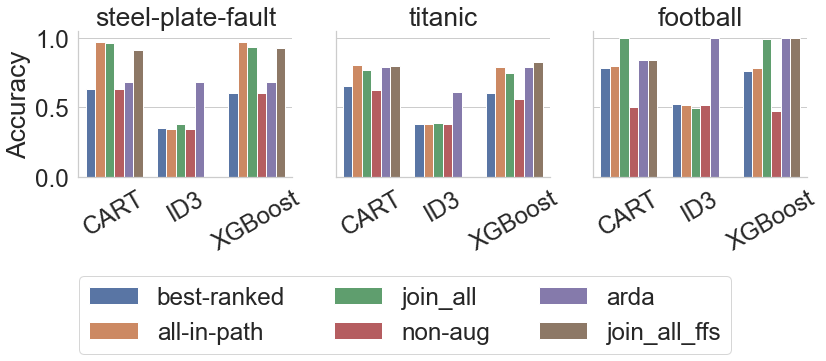

In [87]:
# Accuracy of BestRank, JoinAll and Non-Aug

# SMALL DATASETS

display(accuracy.head())

label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

accuracy.sort_values(by=['algorithm'], ascending=True, inplace=True)
accuracy.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)

accuracy_filtered = accuracy[accuracy["dataset"].isin(small_datasets)]


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="accuracy", hue="approach", col="dataset", data=accuracy_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/accuracy-all-small.pdf', dpi=300, bbox_inches="tight")




,dataset,algorithm,depth,approach,accuracy
6,PubMed_Diabetes,CART,1.0,best-ranked,0.376125
9,WebKP 2,CART,1.0,best-ranked,0.470925
16,steel-plate-fault,ID3,4.0,best-ranked,0.355155
7,PubMed_Diabetes,ID3,2.0,best-ranked,0.399389
13,football,ID3,4.0,best-ranked,0.528358


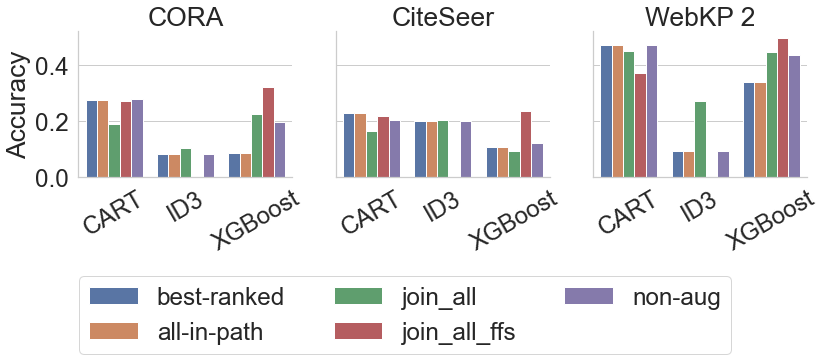

In [86]:
# Accuracy of BestRank, JoinAll and Non-Aug

# BIG DATASETS

display(accuracy.head())

label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

accuracy.sort_values(by=['algorithm'], ascending=True, inplace=True)
accuracy.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)

accuracy_filtered = accuracy[accuracy["dataset"].isin(big_datasets)]
accuracy_filtered = accuracy_filtered[accuracy_filtered["approach"] != "arda"]


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="accuracy", hue="approach", col="dataset", data=accuracy_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/accuracy-all-big.pdf', dpi=300, bbox_inches="tight")




,dataset,algorithm,depth,approach,total_time
0,CORA,CART,2.0,best-ranked,6.836225
1,CORA,ID3,2.0,best-ranked,70.814658
2,CORA,XGBoost,2.0,best-ranked,8.805357
3,CiteSeer,CART,2.0,best-ranked,11.095457
4,CiteSeer,ID3,2.0,best-ranked,164.421718


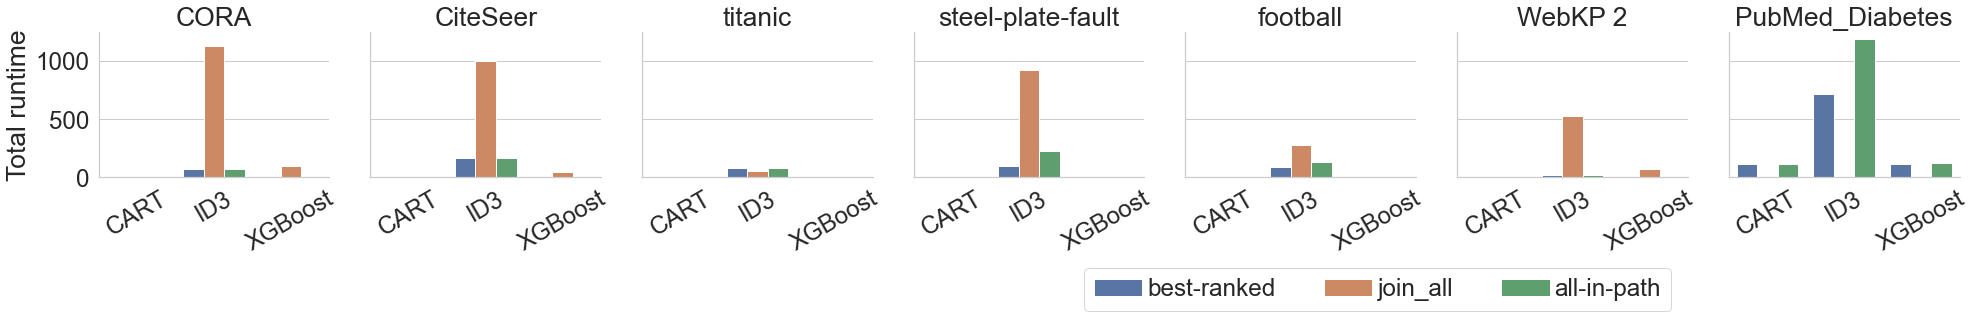

In [19]:
# Accuracy of BestRank, JoinAll and Non-Aug

best_ranked = df[df['approach']=='best-ranked']
# display(best_ranked)

all_path = df[df['approach']=='all-in-path']
# display(all_path)

join_all = df[df['approach']=='join_all']
# display(join_all)

best_ranked_df = best_ranked.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

all_path_df = all_path.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

join_all_df = join_all.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

concat_df = pd.concat([best_ranked_df, all_path_df, join_all_df])

display(concat_df.head())

# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

concat_df.sort_values(by=['algorithm'], ascending=True, inplace=True)
# concat_df.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=concat_df, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total runtime')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/runtime-all.pdf', dpi=300, bbox_inches="tight")





,dataset,algorithm,depth,approach,join_time
0,WebKP 2,CART,1.0,all-in-path,0.404428
35,steel-plate-fault,CART,6.0,all-in-path,3.572265
21,football,CART,4.0,best-ranked,1.037826
21,football,CART,4.0,best-ranked,1.037826
54,titanic,CART,3.0,best-ranked,0.249590
...,...,...,...,...,...
29,football,XGBoost,2.0,arda,0.021391
14,WebKP 2,XGBoost,2.0,best-ranked,0.404428
13,WebKP 2,XGBoost,2.0,arda,0.062948
30,football,XGBoost,2.0,best-ranked,1.037826


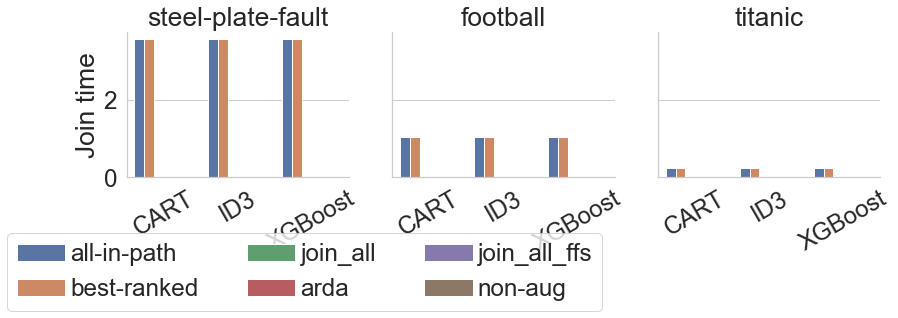

In [37]:



# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

### SMALL DATASETS JOIN TIME

join_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
# join_time.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)
join_time_filtered = join_time[join_time['dataset'].isin(small_datasets)]

display(join_time)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="join_time", hue="approach", col="dataset", data=join_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Join time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/join-time-all.pdf', dpi=300, bbox_inches="tight")






In [117]:
train_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
#     dff = dataframe[(dataframe['dataset']!='PubMed_Diabetes') & (dataframe['dataset']!='CiteSeer') & (dataframe['dataset']!='CORA')]
    dff = dff.groupby(['dataset', 'algorithm', 'approach'])['train_time'].max().to_frame(name='train_time').reset_index()
    if train_time is None:
        train_time = dff
    else:
        train_time = pd.concat([train_time, dff])

/var/folders/km/z6wvxv8n1dn175ygr9vd795m0000gq/T/ipykernel_13899/235570153.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)


,dataset,algorithm,depth,approach,train_time
15,steel-plate-fault,CART,13.0,best-ranked,-2.770432+0.000000j
12,football,CART,4.0,best-ranked,-3.129674+0.000000j
12,steel-plate-fault,CART,1.0,arda,-4.381279+0.000000j
18,titanic,CART,3.0,best-ranked,-3.394643+0.000000j
15,titanic,CART,1.0,arda,-4.595420+0.000000j
9,football,CART,2.0,arda,-4.488276+0.000000j
10,football,ID3,4.0,arda,-0.659622+0.000000j
16,titanic,ID3,2.0,arda,-3.004397+0.000000j
13,steel-plate-fault,ID3,2.0,arda,-2.867076+0.000000j
13,football,ID3,4.0,best-ranked,4.461605+0.000000j


/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


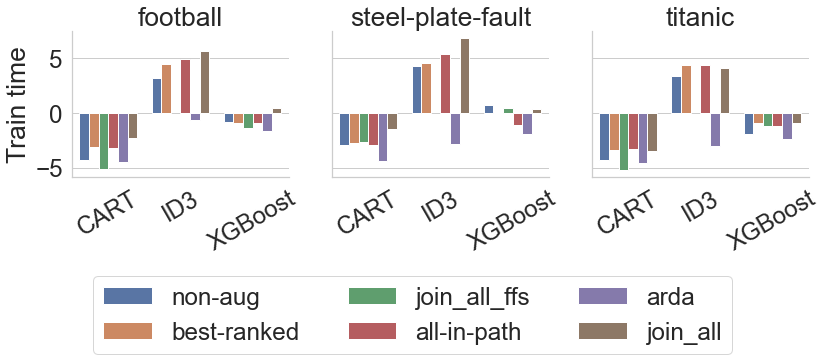

In [85]:
# Accuracy of BestRank, JoinAll and Non-Aug
from cmath import log

# display(train_time)

#### TRAIN TIME small datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

train_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
train_time_filtered = train_time[train_time['dataset'].isin(small_datasets)]
train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
display(train_time_filtered[(train_time_filtered['approach'] == 'best-ranked') | (train_time_filtered['approach'] == 'arda')])
# train_time.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="train_time", hue="approach", col="dataset", data=train_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Train time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/train-time-all-small.pdf', dpi=300, bbox_inches="tight")

/var/folders/km/z6wvxv8n1dn175ygr9vd795m0000gq/T/ipykernel_13899/128358905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentati

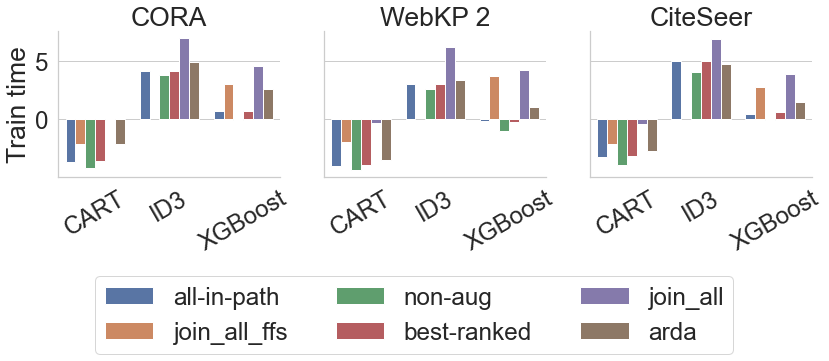

In [84]:
# Accuracy of BestRank, JoinAll and Non-Aug

from cmath import log
# display(train_time)

#### TRAIN TIME BIG datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

train_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
train_time_filtered = train_time[train_time['dataset'].isin(big_datasets)]
# train_time_filtered = train_time_filtered[train_time_filtered['approach'] != 'join_all']
train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
# train_time.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="train_time", hue="approach", col="dataset", data=train_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Train time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/train-time-all-big.pdf', dpi=300, bbox_inches="tight")

,dataset,algorithm,approach,depth
9,football,CART,join_all,8.0
3,CiteSeer,CART,join_all,3.0
6,PubMed_Diabetes,CART,all-in-path,3.0
9,WebKP 2,CART,all-in-path,1.0
0,CORA,CART,join_all,4.0


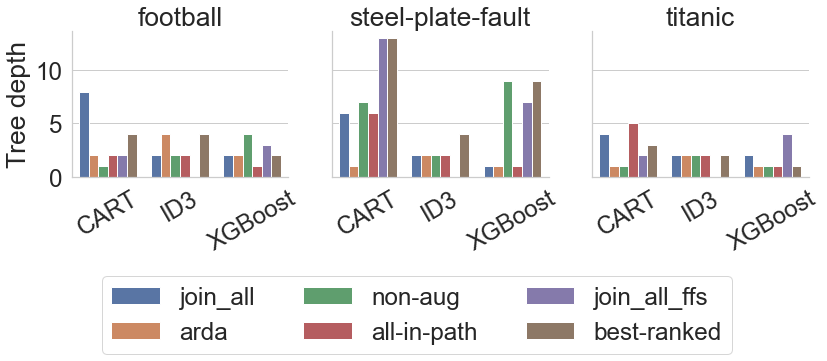

In [83]:

display(depth.head())

# DEPTH SMALL labels
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

depth.sort_values(by=['algorithm'], ascending=True, inplace=True)
depth_filtered = depth[depth["dataset"].isin(small_datasets)]
# depth.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="depth", hue="approach", col="dataset", data=depth_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Tree depth')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/depth-all-small.pdf', dpi=300, bbox_inches="tight")





,dataset,algorithm,approach,depth
9,football,CART,join_all,8.0
6,WebKP 2,CART,arda,2.0
9,football,CART,non-aug,1.0
9,football,CART,arda,2.0
12,steel-plate-fault,CART,arda,1.0


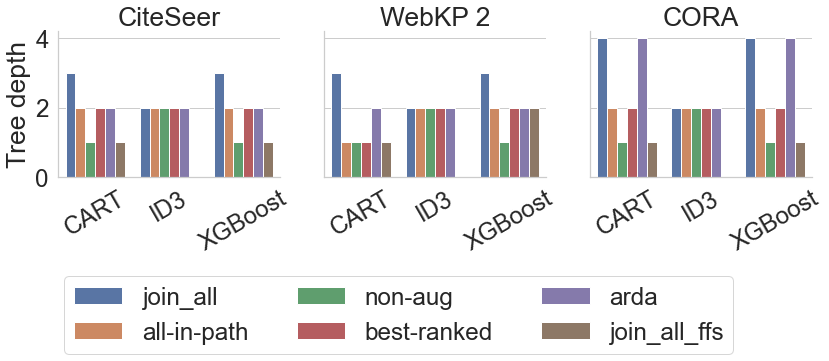

In [80]:
display(depth.head())

# DEPTH BIG labels
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

depth.sort_values(by=['algorithm'], ascending=True, inplace=True)
depth_filtered = depth[depth["dataset"].isin(big_datasets)]
# depth.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="depth", hue="approach", col="dataset", data=depth_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Tree depth')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/depth-all-big.pdf', dpi=300, bbox_inches="tight")


/var/folders/km/z6wvxv8n1dn175ygr9vd795m0000gq/T/ipykernel_13899/2834522198.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentat

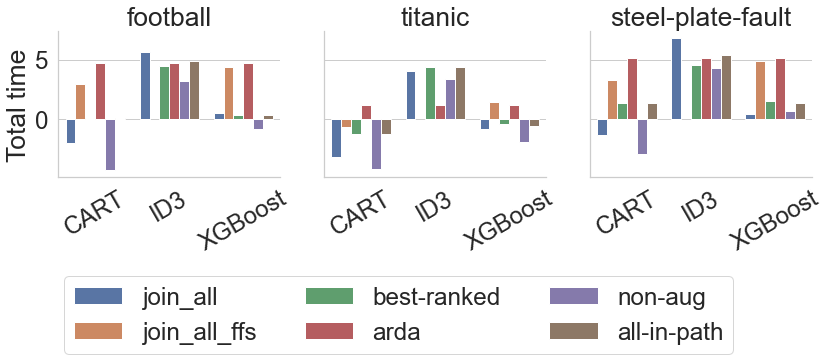

In [79]:
# Accuracy of BestRank, JoinAll and Non-Aug

from cmath import log
# display(train_time)

#### TOTAL TIME SMALL datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

total_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
total_time_filtered = total_time[total_time['dataset'].isin(small_datasets)]
# total_time_filtered = total_time_filtered[total_time_filtered['approach'] != 'join_all']
total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
# total_time.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=total_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/total-time-all-small.pdf', dpi=300, bbox_inches="tight")

/var/folders/km/z6wvxv8n1dn175ygr9vd795m0000gq/T/ipykernel_13899/3496262912.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentation/lib/python3.10/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/alexandrubalan/miniconda3/envs/auto-data-augmentat

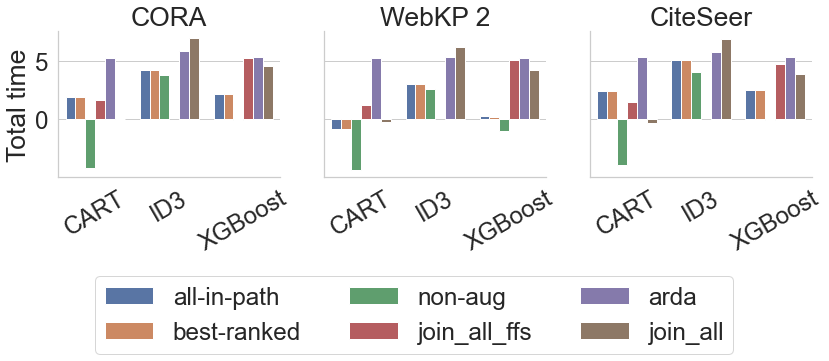

In [78]:
from cmath import log
# display(train_time)

#### TOTAL TIME BIG datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

total_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
total_time_filtered = total_time[total_time['dataset'].isin(big_datasets)]
# total_time_filtered = total_time_filtered[total_time_filtered['approach'] != 'join_all']
total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
# total_time.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=total_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)


g.savefig('plots/total-time-all-big.pdf', dpi=300, bbox_inches="tight")

,accuracy,algorithm,score,feat_sel,max_depth,base_table,seconds
3,81.43,CART,0.294528,information-gain,3.0,football,1.023950
24,80.00,CART,0.654151,spearman-correlation,5.0,kidney_disease,0.438227
39,100.00,CART,0.713139,spearman-correlation,7.0,steel_plate_fault,1.506733
45,77.65,CART,0.621203,symmetrical uncertainty,2.0,titanic,0.622389
4,60.76,ID3,0.294528,information-gain,NaN,football,7.100381


,accuracy,algorithm,max_depth,base_table,seconds
0,100.00,CART,13.0,football,6.067329
3,96.25,CART,23.0,kidney_disease,1.015767
6,100.00,CART,11.0,steel_plate_fault,5.718045
9,81.22,CART,1.0,titanic,0.675928
1,73.44,ID3,NaN,football,70.237812


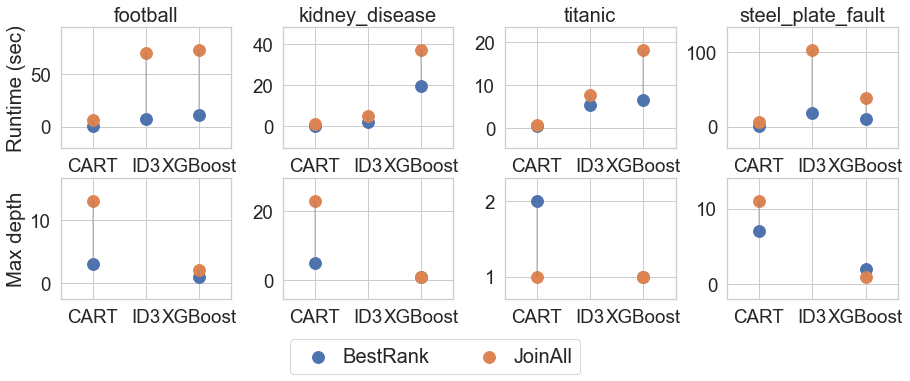

In [7]:
# Runtime BestRank and JoinAll per algorithm 
# Tree depth BestRank and JoinAll per algorithm


pipeline_small_df['seconds'] = pipeline_small_df['runtime'].apply(lambda x: timeparse(x))
df = pipeline_small_df.drop(columns=['dataset', 'path', 'path_ids', 'criterion', 'runtime'])

df['help'] = df.groupby(['base_table', 'algorithm', 'seconds'])['accuracy'].transform('max')
df.drop(df[df['accuracy'] != df['help']].index, inplace=True)
df.drop(columns=['help'], inplace=True)

df['help'] = df.groupby(['base_table', 'algorithm'])['seconds'].transform('min')
df.drop(df[df['seconds'] != df['help']].index, inplace=True)
df.drop(columns=['help'], inplace=True)

best_ranked_acc_time = df.copy()
best_ranked_acc_time.sort_values(by=['algorithm'], inplace=True)

display(best_ranked_acc_time.head())



join_all_df['seconds'] = join_all_df['runtime'].apply(lambda x: timeparse(x))
df = join_all_df.drop(columns=['dataset', 'runtime', 'criterion'])

join_all_acc_time = df.copy()
join_all_acc_time.sort_values(by=['algorithm'], inplace=True)

display(join_all_acc_time.head())



sns.set(font_scale=1.7, style="whitegrid")
colors = sns.color_palette("Set2")


f, axs = plt.subplots(2, 4, figsize=(15, 5))
f.subplots_adjust(wspace=0.3, hspace=0.25)



def plot_runtime(best_path_df, join_all, base_table_name, axis):
    df2 = best_path_df[best_path_df['base_table']==base_table_name]
    df3 = join_all[join_all['base_table']==base_table_name]

    axis.scatter(x=df2['algorithm'], y=df2['seconds'], label='BestRank', s=140)
    axis.scatter(x=df3['algorithm'], y=df3['seconds'], label='JoinAll', s=140)
    axis.vlines(x=algs, ymin=df2['seconds'], ymax=df3['seconds'], color='grey', alpha=0.4)
    axis.set_title(f"{base_table_name}",fontsize=20)
    
    
def plot_depth(best_path_df, join_all, base_table_name, axis):
    df2 = best_path_df[best_path_df['base_table']==base_table_name]
    df3 = join_all[join_all['base_table']==base_table_name]

    axis.scatter(x=df2['algorithm'], y=df2['max_depth'], label='BestRank', s=140)
    axis.scatter(x=df3['algorithm'], y=df3['max_depth'], label='JoinAll', s=140)
    axis.vlines(x=algs, ymin=df2['max_depth'], ymax=df3['max_depth'], color='grey', alpha=0.4)

tables_order = ['football', 'kidney_disease', 'titanic', 'steel_plate_fault']
for i, name in enumerate(tables_order):
    plot_runtime(best_ranked_acc_time, join_all_acc_time, name, axs[0][i])
    axs[0][i].margins(0.3)
    plot_depth(best_ranked_acc_time, join_all_acc_time, name, axs[1][i])
    axs[1][i].margins(0.3)
    

axs[0][0].set_ylabel('Runtime (sec)')
axs[1][0].set_ylabel('Max depth')
hh, ll = plt.gca().get_legend_handles_labels()
legend = plt.legend(hh, ll, bbox_to_anchor=(-0.8, -0.7), loc=4, ncol=3, handletextpad=0.2, fontsize=20)

plt.savefig('plots/depth-runtime.pdf', dpi=300, bbox_inches="tight")
    